In [ ]:
# Titan Data Set - https://drive.google.com/file/d/1UefqSYrYUP3AeR0g3Md7GxhGxZ422ARp/view?usp=sharing

https://drive.google.com/file/d/1UefqSYrYUP3AeR0g3Md7GxhGxZ422ARp/view?usp=sharing

Kaggle - https://www.kaggle.com/competitions/titanic/data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Titanic_train.csv")

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C


In [ ]:
# Global Checks - 

# 2. Complete Row as duplicates
# 3. Check for missing/NULL data (FillNA or DropNa)
# 4. Types of data
# 5. Outliers  (for each col)

# PassengerID - 
# 1. These are unique ID (Duplicate)
# 2. This feature is not influening our Survival Rate 
# 3. This is Numerical in nature

# Pclass - Ticket Class [1 = 1st, 2 = 2nd, 3 = 3rd]
# 1. Categorical in Nature 
# 2. It should not be greater than 3 and less than 1 
# 3. Count of passenger in each Ticket Class 
# 4. Probably, this feature impacts the survival rate


# Name - (Passenger Name)
# 1. String
# 2. Does not impact the survival rate
# 3. String Checks (White Spaces)

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C


In [ ]:
# Gender - 
# 1. How many category of gender are present in data ? 
# 2. Count of each gender 
# 3. Probably Gender can influence Survival 


# Age - 
# 1. Make relevant age buckets .. 
# 2. This will impact the survivial rate 

# SibSp + ParCh ( how many dependent people) Sibling Spouce Parent Children
# 1. Revelant Bucketing .. 

# Ticket Number - 
# 1. Unique .. 
# 2. No Impact 


# Fare - 
# 1. 

# Cabin - 
# 1 

# Embarked - 
# 1.

In [ ]:
df.shape

(891, 12)

In [ ]:
# Check if all ID's are unique - 
df.PassengerId.nunique()

891

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.Survived.sum() / df.shape[0] * 100

38.38383838383838

In [ ]:
df.isnull().sum() / df.shape[0] * 100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
df.shape[0] - df.Cabin.isna().sum() 

204

In [ ]:
df.Cabin.nunique()

147

In [ ]:
# for 204 people we have Cabin entry, but these 204 people are distributed in 147 different Cabin

In [ ]:
# Hypo - That Class was not allocated to low Tier folks

In [ ]:
df.groupby(["Pclass", 'Cabin']).size()

Pclass  Cabin
1       A10      1
        A14      1
        A16      1
        A19      1
        A20      1
                ..
3       F E69    1
        F G63    1
        F G73    2
        F38      1
        G6       4
Length: 147, dtype: int64

In [ ]:
pd.crosstab(df.Pclass, columns=df.Cabin)

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Pclass,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,2,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,3,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,2,0,0,1,0,4,0


In [ ]:
print(df.loc[(df.Pclass == 1) & (df.Cabin.isna())].shape[0] / df.loc[df.Pclass == 1].shape[0])
print(df.loc[(df.Pclass == 2) & (df.Cabin.isna())].shape[0] / df.loc[df.Pclass == 2].shape[0])
print(df.loc[(df.Pclass == 3) & (df.Cabin.isna())].shape[0] / df.loc[df.Pclass == 3].shape[0])

0.18518518518518517
0.9130434782608695
0.9755600814663951


In [ ]:
# 18% of Pclass 1 had no Cabin
# 91% for Pclass 2 
# 97% of Pclass 3

In [ ]:
# Hypo rejected as Null cabins are distributed across class

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.Survived = df.Survived.astype('category')

In [ ]:
df.Pclass = df.Pclass.astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(2), float64(2), int64(3), object(5)
memory usage: 71.7+ KB


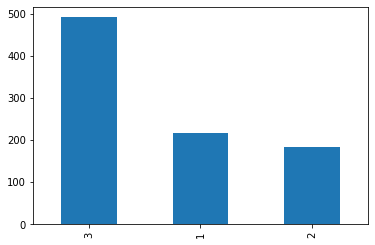

In [ ]:
df.Pclass.value_counts().plot.bar()

In [ ]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
119/ (372+119)

0.24236252545824846

In [ ]:
136/(136 + 80)

0.6296296296296297

In [ ]:
df.groupby(['Pclass', 'Survived']).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

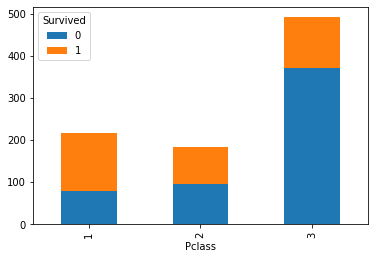

In [ ]:
pd.crosstab(df.Pclass, df.Survived).plot.bar(stacked = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


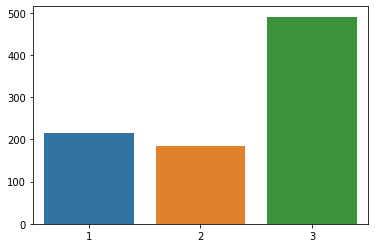

In [ ]:
sns.barplot(df.Pclass.value_counts().index, 
            y=df.Pclass.value_counts().values)

In [ ]:
# Linear 
# y = m1x1 +m2x2 + m3x3 + m4x4 + c

In [ ]:
# PClass - 1, 2, 3

In [ ]:
# Categorical(in Num format) Col Convertion - 

# One Hot Encoding - 
# Old Format - 
#SNo.  PClass
# 1.    1
# 2.    2
# 3.    1
# 4.    3
# 5.    1

# SNo.  PClass_1   PClass_2    PClass_3
# 1.      1           0           0
# 2.      0           1           0
# 3.      1           0           0
# 4.      0           0           1
# 5.      1           0           0 


In [ ]:
pd.get_dummies(df.Pclass, prefix="Pclass")

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [ ]:
df2 = pd.DataFrame(columns=["Pclass"])

In [ ]:
df2.Pclass = np.random.choice(["A", "B", "C"], 20)

In [ ]:
df2

,Pclass
0,A
1,C
2,A
3,B
4,B
5,B
6,C
7,C
8,B
9,C


In [ ]:
pd.get_dummies(df2)

,Pclass_A,Pclass_B,Pclass_C
0,1,0,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,0,1
7,0,0,1
8,0,1,0
9,0,0,1


In [ ]:
# Opt - There are 17 different category only 5 of them are dominating ... 
# A,B,C,D,E ... convert all the minor category into "Others"

In [ ]:
# Opt - All of the category are evenly ditributed. 
# Then will be calcuate the impact on output variable

In [ ]:
df.Sex.map({'male': 0, 'female': 1}) 

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
#Fill NA in Age

In [ ]:
# Cont Columns ... 

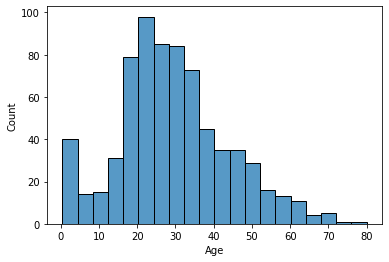

In [ ]:
sns.histplot(df.Age)

In [ ]:
# Min Max Scaling - 
# x - x_min/ (x_max - x_min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max = MinMaxScaler()

In [ ]:
min_max.fit_transform(df[["Fare"]])

array([[0.01415106],
       [0.13913574],
       [0.01546857],
       [0.1036443 ],
       [0.01571255],
       [0.0165095 ],
       [0.10122886],
       [0.04113566],
       [0.02173075],
       [0.05869429],
       [0.03259623],
       [0.05182215],
       [0.01571255],
       [0.06104473],
       [0.01533038],
       [0.03122992],
       [0.05684821],
       [0.02537431],
       [0.03513366],
       [0.01410226],
       [0.05074862],
       [0.02537431],
       [0.01567195],
       [0.06929139],
       [0.04113566],
       [0.06126432],
       [0.01410226],
       [0.51334181],
       [0.01537917],
       [0.01541158],
       [0.0541074 ],
       [0.28598956],
       [0.01512699],
       [0.02049464],
       [0.16038672],
       [0.10149724],
       [0.01411046],
       [0.01571255],
       [0.03513366],
       [0.02194234],
       [0.01849397],
       [0.04098927],
       [0.01541158],
       [0.08115719],
       [0.01537917],
       [0.01571255],
       [0.03025399],
       [0.015

In [ ]:
# Standard Scaling - 
# (x - x_mean)/(x_std)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit_transform(df[["Fare"]])

array([[-5.02445171e-01],
       [ 7.86845294e-01],
       [-4.88854258e-01],
       [ 4.20730236e-01],
       [-4.86337422e-01],
       [-4.78116429e-01],
       [ 3.95813561e-01],
       [-2.24083121e-01],
       [-4.24256141e-01],
       [-4.29555021e-02],
       [-3.12172378e-01],
       [-1.13845709e-01],
       [-4.86337422e-01],
       [-1.87093118e-02],
       [-4.90279793e-01],
       [-3.26266659e-01],
       [-6.19988892e-02],
       [-3.86670720e-01],
       [-2.85997284e-01],
       [-5.02948539e-01],
       [-1.24919787e-01],
       [-3.86670720e-01],
       [-4.86756223e-01],
       [ 6.63597416e-02],
       [-2.24083121e-01],
       [-1.64441595e-02],
       [-5.02948539e-01],
       [ 4.64700108e+00],
       [-4.89776426e-01],
       [-4.89442190e-01],
       [-9.02720170e-02],
       [ 2.30172882e+00],
       [-4.92377828e-01],
       [-4.37007438e-01],
       [ 1.00606170e+00],
       [ 3.98582080e-01],
       [-5.02863973e-01],
       [-4.86337422e-01],
       [-2.8

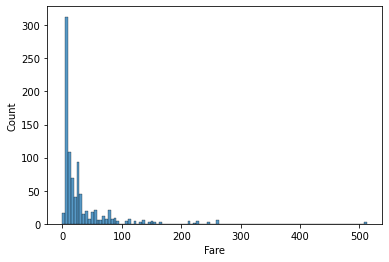

In [ ]:
sns.histplot(df.Fare)

In [ ]:
df["Fare2"] = ss.fit_transform(df[["Fare"]])

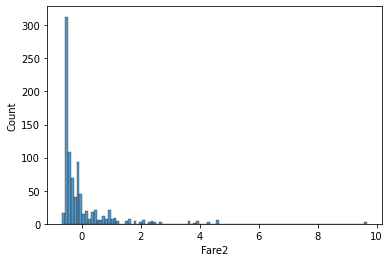

In [ ]:
sns.histplot(df.Fare2)

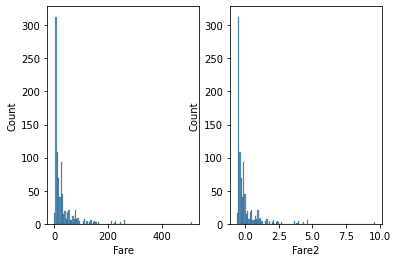

In [ ]:
plt.subplot(1,2, 1)
sns.histplot(df.Fare)
plt.subplot(1,2, 2)
sns.histplot(df.Fare2)

In [ ]:
df2["A"] = np.random.randint(40, 1000, 20)

In [ ]:
df2.A

0     442
1      78
2     802
3     983
4     413
5     881
6     667
7     706
8     496
9     956
10    168
11    130
12    209
13    779
14    760
15    823
16    476
17    819
18    163
19    587
Name: A, dtype: int64

In [ ]:
min_max = MinMaxScaler()

In [ ]:
df2["A_minmax"] = min_max.fit_transform(df2[["A"]])

In [ ]:
df2

,Pclass,A,A_minmax
0,A,442,0.402210
1,C,78,0.000000
2,A,802,0.800000
3,B,983,1.000000
4,B,413,0.370166
5,B,881,0.887293
6,C,667,0.650829
7,C,706,0.693923
8,B,496,0.461878
9,C,956,0.970166


In [ ]:
min_max.inverse_transform(df2[["A_minmax"]])

array([[442.],
       [ 78.],
       [802.],
       [983.],
       [413.],
       [881.],
       [667.],
       [706.],
       [496.],
       [956.],
       [168.],
       [130.],
       [209.],
       [779.],
       [760.],
       [823.],
       [476.],
       [819.],
       [163.],
       [587.]])

In [ ]:
#Python - List, Dict, Func 
# Numpy - Concat, Slicinng/ Indexing, Stacking, Operation on array 
# Pandas - .loc/.iloc, Col Transformation, GroupBy, CrossTab, Merge 


# Think Stat - https://greenteapress.com/thinkstats2/thinkstats2.pdf 
# Maths for ML - https://mml-book.github.io/ 
